<h1>PROYECTO DE NLP<br>
Identificador de sentimiento de tus canciones favoritas en inglés<br>
¿Escuchas más canciones con mensajes positivos o negativos?<br>
Descubre los resultados</h1>




In [1]:
#Web Scraping
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import service
import requests

#NLP
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import pandas as pd

#PCA
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Sentimiento
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Modelos
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist 
from sklearn.metrics import silhouette_score

#Word CLoud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # tratamiento de imagenes
import PIL


<h2> Funciones </h2>

In [2]:

#Función para eliminar tildes
def sin_tildes(t):
    tildes = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for origen, destino in tildes:
        t = t.replace(origen, destino)
    return t

#Esta función nos permite buscar la letra de una canción en la página web www.letras.com e importarla
def letras_canciones(g,c): 
    chrome_driver = "chromedriver.exe" #establecemos el buscador 
    driver_service = Service(executable_path=chrome_driver)
    navegador = webdriver.Chrome(service=driver_service)
    navegador.get(f"https://www.letras.com/{g}/{c}/")  #al link le colocamos nuestras variables
    response = requests.get(f"https://www.letras.com/{g}/{c}/")
    bs = BeautifulSoup(response.text, "html.parser")
    letra= [i.text for i in bs.find_all(class_="cnt-letra p402_premium")] #acá es donde se aloja la letra de la canción en la página web
    #como la letra se importa con algunos errores, añadimos los siguientes campos para modificarla
    letra="".join(letra) #convertimos nuestra lista en str
    letra= sin_tildes(letra) #aplicamos función para remover las tildes
    letra = re.sub(r"[\W\d_]+", " ",letra) # remover caract especiales y números
    letras = []
    letras = re.findall('[A-Z][^A-Z]*', letra) #Separamos las frases por mayúsculas  #Convertimos nuevamente en string para trabajar con ella
    letras=" ".join(letras) 
    letras=letras.lower() # Transformamos todas nuestras palabras en minusculas
    return letras


#Esta función nos indica la riqueza léxica de nuestra canción
def riqueza_lexica(tokens): 
    tokens_conjunto=set(tokens) #hago un set
    palabras_totales=len(tokens) 
    palabras_diferentes=len(tokens_conjunto)
    riqueza_lexica=palabras_diferentes/palabras_totales
    return (round(riqueza_lexica*100,2))

#Obtención de texto raíz limpio
palabras_funcionales=nltk.corpus.stopwords.words("english")
stemmer=SnowballStemmer("english")
def texto_raiz(texto):    
    texto = texto.split() # tokenizar
    texto = [palabra for palabra in texto if len(palabra) > 3] # eliminar palabras con menos de 3 letras
    texto = [palabra for palabra in texto if palabra not in palabras_funcionales] # stopwords
    texto = [stemmer.stem(palabra) for palabra in texto] #stem
    texto = " ".join(texto)
    
    return texto


<h3> Ingresa los datos indicados </h3>

In [3]:
#reemplazamos los espacios por '-' para tener el formato deseado
#Canción 1
g1=('lana del rey').replace(' ','-')
c1=('summertime sadness').replace(' ','-')
#Canción 2
g2=('post malone').replace(' ','-')
c2=('congratulations').replace(' ','-')
#Canción 3
g3=('the weeknd').replace(' ','-')
c3=('Blinding Lights').replace(' ','-')
#Canción 4
g4=('Usher').replace(' ','-')
c4=('new flame').replace(' ','-')
#Canción 5
g5=('royksopp').replace(' ','-')
c5=('monument').replace(' ','-')
#Canción 6
g6=('london grammar').replace(' ','-')
c6=('wasting my young years').replace(' ','-')
#Canción 7
g7=('kate bush').replace(' ','-')
c7=('running up that hill').replace(' ','-')
#Canción 8
g8=('kygo').replace(' ','-')
c8=('riding shotgun').replace(' ','-')
#Canción 9
g9=('blink-182').replace(' ','-')
c9=('i miss you').replace(' ','-')
#Canción 10
g10=('keane').replace(' ','-')
c10=('somewhere only me know').replace(' ','-')

Un poco de Web Scraping nunca viene mal 

In [4]:
#Aplicamos la función para obtener las letras de los grupos musicales y canciones seleccionadas previamente
letra1= letras_canciones(g1,c1)
letra2= letras_canciones(g2,c2)
letra3= letras_canciones(g3,c3)
letra4= letras_canciones(g4,c4)
letra5= letras_canciones(g5,c5)
letra6= letras_canciones(g6,c6)
letra7= letras_canciones(g7,c7)
letra8= letras_canciones(g8,c8)
letra9= letras_canciones(g9,c9)
letra10= letras_canciones(g10,c10)

In [5]:
#convertimos nuestras letras en tokens
tokens=[(nltk.word_tokenize(letra1,"english")),(nltk.word_tokenize(letra2,"english")),(nltk.word_tokenize(letra3,"english")),(nltk.word_tokenize(letra4,"english")),(nltk.word_tokenize(letra5,"english")),(nltk.word_tokenize(letra6,"english")),(nltk.word_tokenize(letra7,"english")),(nltk.word_tokenize(letra8,"english")),(nltk.word_tokenize(letra9,"english")),(nltk.word_tokenize(letra10,"english"))]

<h3> Evaluamos las letras de las canciones </h3>

In [6]:
#riqueza léxica de cada canción
num= 0
for token in tokens:
    num+=1
    print(r'La Letra ',str(num),' tiene una riqueza léxica de: ',riqueza_lexica(token))


La Letra  1  tiene una riqueza léxica de:  30.75
La Letra  2  tiene una riqueza léxica de:  32.81
La Letra  3  tiene una riqueza léxica de:  32.75
La Letra  4  tiene una riqueza léxica de:  44.47
La Letra  5  tiene una riqueza léxica de:  25.0
La Letra  6  tiene una riqueza léxica de:  36.31
La Letra  7  tiene una riqueza léxica de:  22.79
La Letra  8  tiene una riqueza léxica de:  28.45
La Letra  9  tiene una riqueza léxica de:  30.48
La Letra  10  tiene una riqueza léxica de:  29.43


In [7]:
#eliminamos las palabras funcionales

tokens_limpios=[] 

for token in tokens:
    for i in token:
        if i not in palabras_funcionales: 
            if len(i) > 3:
                if i != "yeah":
                    tokens_limpios.append(i)
print(len(tokens_limpios))

1156


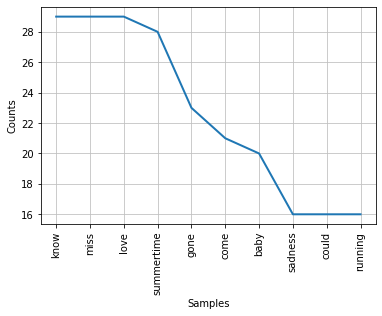

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
nltk.FreqDist(nltk.Text(tokens_limpios)).plot(10)

In [9]:
#Analizamos los datos de la gráfica
distribucion=nltk.FreqDist(tokens_limpios) 
lista_frecuencias=distribucion.most_common() #Para ordenar la distribución de la frecuencia de palabras
print(lista_frecuencias)

[('know', 29), ('miss', 29), ('love', 29), ('summertime', 28), ('gone', 23), ('come', 21), ('baby', 20), ('sadness', 16), ('could', 16), ('running', 16), ('like', 15), ('said', 15), ('back', 15), ('never', 13), ('make', 13), ('feel', 11), ('young', 11), ('made', 10), ('maybe', 10), ('time', 10), ('bump', 10), ('somewhere', 10), ('hard', 9), ('need', 8), ('inside', 8), ('hill', 8), ('getting', 8), ('tonight', 7), ('think', 7), ('since', 7), ('cause', 7), ('voice', 7), ('nothing', 6), ('changed', 6), ('ever', 6), ('always', 6), ('call', 6), ('sleep', 6), ('road', 6), ('till', 6), ('want', 6), ('wasting', 6), ('years', 6), ('deal', 6), ('riding', 6), ('shotgun', 6), ('waste', 6), ('already', 6), ('head', 6), ('kiss', 5), ('ball', 5), ('much', 5), ('touch', 5), ('tell', 5), ('keep', 5), ('matter', 5), ('swap', 5), ('places', 5), ('wanted', 4), ('best', 4), ('done', 4), ('even', 4), ('congratulations', 4), ('people', 4), ('look', 4), ('everything', 4), ('life', 4), ('though', 4), ('around',

In [10]:
#Creamos nuestro dataFrame
df = pd.DataFrame(columns = ["Grupo musical","Canción","Letra"])
df["Grupo musical"]=[g1,g2,g3,g4,g5,g6,g7,g8,g9,g10]
df['Canción']=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10]
df["Letra"] =[letra1,letra2,letra3,letra4,letra5,letra6,letra7,letra8,letra9,letra10]
df['Letra raiz']= df['Letra'].apply(lambda texto: texto_raiz(texto)) #Aplicamos la función texto_raiz que nos convierte las palabras en sus raíces y las limpia
df

,Grupo musical,Canción,Letra,Letra raiz
0,lana-del-rey,summertime-sadness,kiss me hard before you go summertime sadness ...,kiss hard summertim sad want know babi best dr...
1,post-malone,congratulations,post malone yeah yeah yeah my mama called s...,post malon yeah yeah yeah mama call seen said ...
2,the-weeknd,Blinding-Lights,yeah i ve been tryna call i ve been on my own ...,yeah tryna call long enough mayb show love may...
3,Usher,new-flame,ooh ooh hey na na na na na what ya ll w...,wanna wanna tell around much could slow still ...
4,royksopp,monument,make a space for my body dig a hole push the s...,make space bodi hole push side apart control m...
5,london-grammar,wasting-my-young-years,you cross this line do you find it hard to sit...,cross line find hard tonight walk mile walk st...
6,kate-bush,running-up-that-hill,it doesn t hurt me do you want to feel how it ...,hurt want feel feel want know know hurt want h...
7,kygo,riding-shotgun,i love you more than money love you more than ...,love money love dope know temper came rope cor...
8,blink-182,i-miss-you,i miss you miss you hello there the angel fro...,miss miss hello angel nightmar shadow backgrou...
9,keane,somewhere-only-me-know,i walked across an empty land i knew the pathw...,walk across empti land knew pathway like back ...


Analizamos el  Sentimiento

In [11]:
vader = SentimentIntensityAnalyzer()

In [12]:
df['Sentimiento'] = df['Letra raiz'].apply(lambda valor: vader.polarity_scores(valor)['compound']) #Aplicamos la función a todas nuestras letras
df.sort_values('Sentimiento', ascending=False) #organizamos las letras con mensajes más positivos hasta las más negativas


,Grupo musical,Canción,Letra,Letra raiz,Sentimiento
4,royksopp,monument,make a space for my body dig a hole push the s...,make space bodi hole push side apart control m...,0.9983
1,post-malone,congratulations,post malone yeah yeah yeah my mama called s...,post malon yeah yeah yeah mama call seen said ...,0.9956
3,Usher,new-flame,ooh ooh hey na na na na na what ya ll w...,wanna wanna tell around much could slow still ...,0.9828
7,kygo,riding-shotgun,i love you more than money love you more than ...,love money love dope know temper came rope cor...,0.8979
9,keane,somewhere-only-me-know,i walked across an empty land i knew the pathw...,walk across empti land knew pathway like back ...,0.8555
2,the-weeknd,Blinding-Lights,yeah i ve been tryna call i ve been on my own ...,yeah tryna call long enough mayb show love may...,0.8384
5,london-grammar,wasting-my-young-years,you cross this line do you find it hard to sit...,cross line find hard tonight walk mile walk st...,-0.6126
6,kate-bush,running-up-that-hill,it doesn t hurt me do you want to feel how it ...,hurt want feel feel want know know hurt want h...,-0.9451
0,lana-del-rey,summertime-sadness,kiss me hard before you go summertime sadness ...,kiss hard summertim sad want know babi best dr...,-0.9623
8,blink-182,i-miss-you,i miss you miss you hello there the angel fro...,miss miss hello angel nightmar shadow backgrou...,-0.9864


In [13]:
# ahora vectorizamos 
descripcion = np.array(df['Letra raiz']) # array para armar el bag of words
np.set_printoptions(precision=2)

# forma corta TFIDF vectorizer
vectorizador = TfidfVectorizer()
matriz_palabras = vectorizador.fit_transform(descripcion)

In [14]:
#Creamos un nuevo df con las palabras que existen en nuestras canciones
df1 = pd.DataFrame(matriz_palabras.toarray())
df1.columns = vectorizador.get_feature_names()
df1

,across,aliv,alreadi,alway,angel,anyhow,anymor,apart,arm,around,...,wire,wish,withdraw,woman,work,world,worri,yeah,year,young
0,0.00000,0.028861,0.000000,0.000000,0.000000,0.000000,0.057722,0.000000,0.000000,0.000000,...,0.057722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.056635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.076149,0.000000,0.000000,0.819963,0.021578,0.107890
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200827,...,0.000000,0.000000,0.078747,0.000000,0.000000,0.000000,0.000000,0.066942,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.037555,0.000000,0.000000,0.000000,0.000000,0.100992,0.042926,...,0.000000,0.000000,0.000000,0.050496,0.000000,0.151488,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126811,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076158,0.000000,0.388446,0.388446
6,0.00000,0.000000,0.000000,0.000000,0.041907,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.125256,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.235378,0.058352,0.033349,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.078459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.12262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
#Escalamos nuestros datos
scaler=StandardScaler().fit(df1)
dt=scaler.transform(df1)
df1 = pd.DataFrame(df1)

Reducimos la dimensionalidad de las palabras

[[-0.03  0.01  0.09 ...  0.21  0.19  0.21]
 [-0.02 -0.01 -0.1  ...  0.53  0.03  0.09]
 [ 0.05  0.   -0.06 ...  0.1  -0.03 -0.01]
 ...
 [ 0.04  0.    0.03 ... -0.21 -0.11 -0.14]
 [ 0.    0.   -0.11 ... -0.09  0.14  0.14]
 [-0.26 -0.1  -0.4  ...  0.02  0.01 -0.  ]]


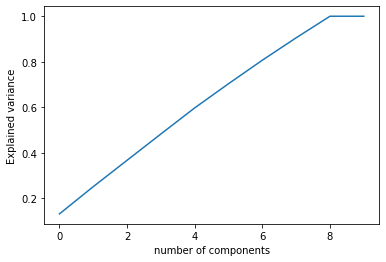

ratio explic. varianza acumulada:  1.0000000000000002


In [16]:
#Recorremos las palabras y las veces que se repiten para determinar el npumero de componentes
pca_prueba = PCA()
pca_prueba = pca_prueba.fit(df1)
print(pca_prueba.components_.round(3))
plt.plot(np.cumsum(pca_prueba.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()
print('ratio explic. varianza acumulada: ',np.cumsum(pca_prueba.explained_variance_ratio_).max())

[[-0.03  0.01  0.09 ...  0.21  0.19  0.21]
 [-0.02 -0.01 -0.1  ...  0.53  0.03  0.09]
 [ 0.05  0.   -0.06 ...  0.1  -0.03 -0.01]
 ...
 [-0.04  0.   -0.08 ... -0.37  0.19  0.15]
 [-0.04  0.    0.04 ...  0.22 -0.05 -0.03]
 [ 0.04  0.    0.03 ... -0.21 -0.11 -0.14]]


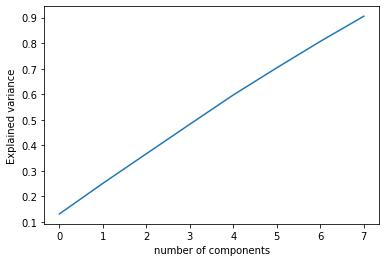

ratio explic. varianza acumulada:  0.9052993591373593


In [17]:
#Podemos notar que con casi 8 dimensiones obtenemos toda la información que necesitamos 
pca = PCA(n_components=8)
pca = pca.fit(df1)
print(pca.components_.round(3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()
print('ratio explic. varianza acumulada: ',np.cumsum(pca.explained_variance_ratio_).max())

In [18]:
Dimension = ['Dimensión'+str(i) for i in range(len(pca.components_)) ]
Dimension
reduced_data = pca.transform(df1)
reduced_data = pd.DataFrame(reduced_data, columns= Dimension )
reduced_data.head()

,Dimensión0,Dimensión1,Dimensión2,Dimensión3,Dimensión4,Dimensión5,Dimensión6,Dimensión7
0,0.187457,-0.456537,0.047376,0.750208,-0.251911,0.091886,0.012731,0.039685
1,0.288034,0.621661,0.134306,0.191772,-0.163776,-0.431378,0.239150,-0.271314
2,0.057585,0.429047,-0.123847,0.118547,0.162545,0.274325,-0.066679,0.680070
3,-0.143203,0.022868,-0.037260,0.077020,0.586222,-0.268383,-0.386750,-0.105835
4,-0.466846,-0.063575,-0.351220,-0.156269,-0.112197,-0.004627,0.604801,0.053333


In [19]:
#Unimos nuestros datos con nuestros datos reducidos
df2 = pd.concat([df,reduced_data], axis=1)
df2

,Grupo musical,Canción,Letra,Letra raiz,Sentimiento,Dimensión0,Dimensión1,Dimensión2,Dimensión3,Dimensión4,Dimensión5,Dimensión6,Dimensión7
0,lana-del-rey,summertime-sadness,kiss me hard before you go summertime sadness ...,kiss hard summertim sad want know babi best dr...,-0.9623,0.187457,-0.456537,0.047376,0.750208,-0.251911,0.091886,0.012731,0.039685
1,post-malone,congratulations,post malone yeah yeah yeah my mama called s...,post malon yeah yeah yeah mama call seen said ...,0.9956,0.288034,0.621661,0.134306,0.191772,-0.163776,-0.431378,0.239150,-0.271314
2,the-weeknd,Blinding-Lights,yeah i ve been tryna call i ve been on my own ...,yeah tryna call long enough mayb show love may...,0.8384,0.057585,0.429047,-0.123847,0.118547,0.162545,0.274325,-0.066679,0.680070
3,Usher,new-flame,ooh ooh hey na na na na na what ya ll w...,wanna wanna tell around much could slow still ...,0.9828,-0.143203,0.022868,-0.037260,0.077020,0.586222,-0.268383,-0.386750,-0.105835
4,royksopp,monument,make a space for my body dig a hole push the s...,make space bodi hole push side apart control m...,0.9983,-0.466846,-0.063575,-0.351220,-0.156269,-0.112197,-0.004627,0.604801,0.053333
5,london-grammar,wasting-my-young-years,you cross this line do you find it hard to sit...,cross line find hard tonight walk mile walk st...,-0.6126,0.531334,0.055618,-0.070465,-0.387172,-0.209408,0.475366,-0.130602,-0.223394
6,kate-bush,running-up-that-hill,it doesn t hurt me do you want to feel how it ...,hurt want feel feel want know know hurt want h...,-0.9451,-0.222292,-0.078224,0.665556,-0.054424,0.340890,0.337454,0.239170,-0.174490
7,kygo,riding-shotgun,i love you more than money love you more than ...,love money love dope know temper came rope cor...,0.8979,-0.419165,0.062217,-0.420432,0.068933,-0.128528,0.158784,-0.337989,-0.357516
8,blink-182,i-miss-you,i miss you miss you hello there the angel fro...,miss miss hello angel nightmar shadow backgrou...,-0.9864,0.440665,-0.454943,-0.231945,-0.282946,0.278027,-0.318321,0.138775,0.090011
9,keane,somewhere-only-me-know,i walked across an empty land i knew the pathw...,walk across empti land knew pathway like back ...,0.8555,-0.253569,-0.138133,0.387932,-0.325669,-0.501866,-0.315107,-0.312607,0.269451


Aplicamos el modelo K-means para que nos agrupe según el sentimiento de las canciones

In [20]:
dfd= df2[['Sentimiento','Dimensión0','Dimensión1','Dimensión2','Dimensión3','Dimensión4','Dimensión5','Dimensión6','Dimensión7']]

In [21]:
kmean= KMeans(2) #número de clusters
kmean.fit(dfd) 
print(kmean.inertia_)

6.843714513907933


In [31]:
X= dfd
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.predict(X)

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [32]:
kmeans.cluster_centers_

array([[-0.88,  0.23, -0.23,  0.1 ,  0.01,  0.04,  0.15,  0.07, -0.07],
       [ 0.93, -0.16,  0.16, -0.07, -0.  , -0.03, -0.1 , -0.04,  0.04]])

In [33]:
df["Clase"] = kmeans.labels_
df.sort_values('Sentimiento', ascending=False)

,Grupo musical,Canción,Letra,Letra raiz,Sentimiento,Clase
4,royksopp,monument,make a space for my body dig a hole push the s...,make space bodi hole push side apart control m...,0.9983,1
1,post-malone,congratulations,post malone yeah yeah yeah my mama called s...,post malon yeah yeah yeah mama call seen said ...,0.9956,1
3,Usher,new-flame,ooh ooh hey na na na na na what ya ll w...,wanna wanna tell around much could slow still ...,0.9828,1
7,kygo,riding-shotgun,i love you more than money love you more than ...,love money love dope know temper came rope cor...,0.8979,1
9,keane,somewhere-only-me-know,i walked across an empty land i knew the pathw...,walk across empti land knew pathway like back ...,0.8555,1
2,the-weeknd,Blinding-Lights,yeah i ve been tryna call i ve been on my own ...,yeah tryna call long enough mayb show love may...,0.8384,1
5,london-grammar,wasting-my-young-years,you cross this line do you find it hard to sit...,cross line find hard tonight walk mile walk st...,-0.6126,0
6,kate-bush,running-up-that-hill,it doesn t hurt me do you want to feel how it ...,hurt want feel feel want know know hurt want h...,-0.9451,0
0,lana-del-rey,summertime-sadness,kiss me hard before you go summertime sadness ...,kiss hard summertim sad want know babi best dr...,-0.9623,0
8,blink-182,i-miss-you,i miss you miss you hello there the angel fro...,miss miss hello angel nightmar shadow backgrou...,-0.9864,0


In [34]:
#Cambiamos los valores de la Columna clase por valores que tengan más sentido
df["Clase"] = df["Clase"].map({1:"Positiva",0:"Negativa"})

In [35]:
# Visualiza el tipo de música (Positivas, Negativas) que escuchas más.
df.groupby(["Clase"]).size()

Clase
Negativa    4
Positiva    6
dtype: int64

Generamos una nube de palabras con el resultado obtenido

In [36]:
#Traemos las imágenes
img = PIL.Image.open("image.jpg")

In [37]:
#array de la imágen
mask = np.array(img)


In [38]:
letrasP = df[df['Clase']=='Positiva']['Letra raiz'].str.cat(sep=' ')
letrasN = df[df['Clase']=='Negativa']['Letra raiz'].str.cat(sep=' ')

<h2>Positivas</h2>

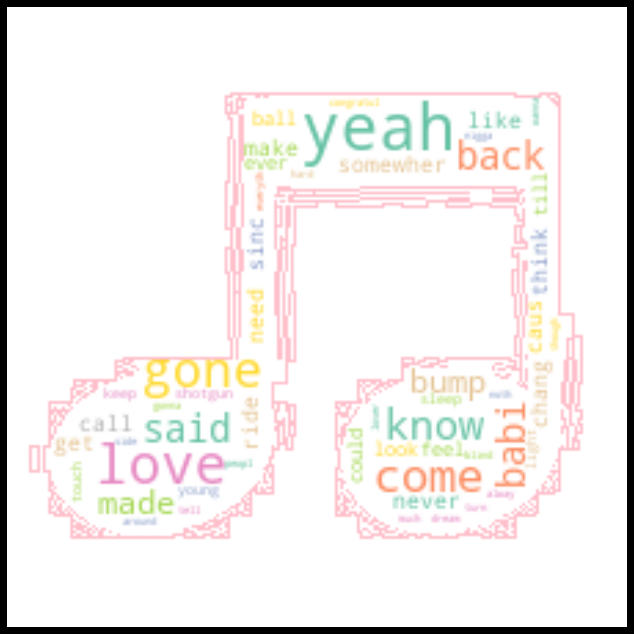

In [39]:

nubeP = WordCloud(width = 300, height = 200, random_state=1, background_color='white', 
colormap='Set2', contour_width=0.01,contour_color='pink', collocations=False, stopwords = palabras_funcionales, mask=mask).generate(letrasP)

plt.figure(figsize=(20,10), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=5)
plt.imshow(nubeP, interpolation='bilinear')
plt.show()

<h2>Negativas</h2>

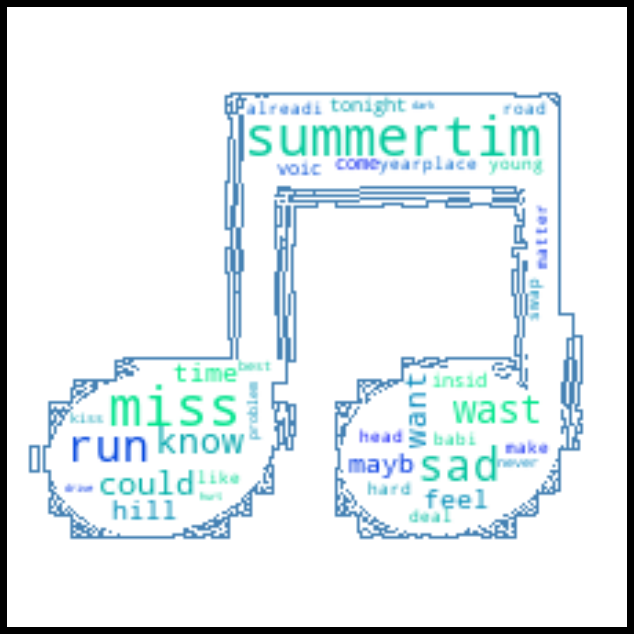

In [40]:
nubeP = WordCloud(width = 300, height = 2000, random_state=1, background_color='white', 
colormap='winter', collocations=False, contour_width=0.01,contour_color='steelblue', stopwords = palabras_funcionales, mask=mask).generate(letrasN)

plt.figure(figsize=(20,10), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=5)
plt.imshow(nubeP, interpolation='bilinear')
plt.show()